In [1]:
# %matplotlib notebook
# %matplotlib tk
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2 as cv

In [2]:
#sample 25 random images

print(os.getcwd())
os.chdir("../concat_data")

#dictionary that stores the file names of the images that were sampled
dict_images = {'focused': [], 'happy': [], 'neutral' : [], 'surprised': []}

for folder in os.listdir(os.getcwd()):

    num_dict = {}
    #get all file_names
    count_images = 0
    for image in os.listdir(folder):
        if (image.endswith('.jpg')):
            num_dict[count_images] = str(image)
            count_images += 1

    #roll a RNG 25 times and generate a number between
    #0 and the number of images in the folder
    num_already_rolled = []
    count = 0
    if (count_images > 0) :
        while count < 25:
            rand_num = np.random.randint(0, count_images)
            if (rand_num not in num_already_rolled):
                
                dict_images[folder].append(num_dict[rand_num])
                count += 1
             

c:\Users\Luis\OneDrive\Concordia\Winter 2024\AI\project\repo\COMP472\preprocessing


In [3]:
#grab each category and append it to a list
dict_images_values = {'focused': {}, 'happy': {}, 'neutral' : {}, 'surprised': {}}

for folder in os.listdir(os.getcwd()):

    red_pixel_arr = []
    green_pixel_arr = []
    blue_pixel_arr = []

    for image in dict_images[folder]:
        #read test.jpg
        # img_array = cv.imread('../preprocessing/test.jpg')
        img_array = cv.imread(folder + "/" + image)
        #convert to rgb
        img_array = cv.cvtColor(img_array, cv.COLOR_BGR2RGB)
        img_array_1D = img_array.flatten()

        #get each R, G and B value and add to an array

        #grab each pixel
        i = 0
        while i < len(img_array_1D):
            red_pixel_arr.append(img_array_1D[i])
            green_pixel_arr.append(img_array_1D[i+1])
            blue_pixel_arr.append(img_array_1D[i+2])
            i += 3
            if (i > 1000000):
                break
    dict_images_values[folder]['red'] = red_pixel_arr
    dict_images_values[folder]['green'] = green_pixel_arr
    dict_images_values[folder]['blue'] = blue_pixel_arr
    




In [6]:
print(len(dict_images_values['neutral']['red']))
print(dict_images_values['neutral']['green'][0:25])

8333350


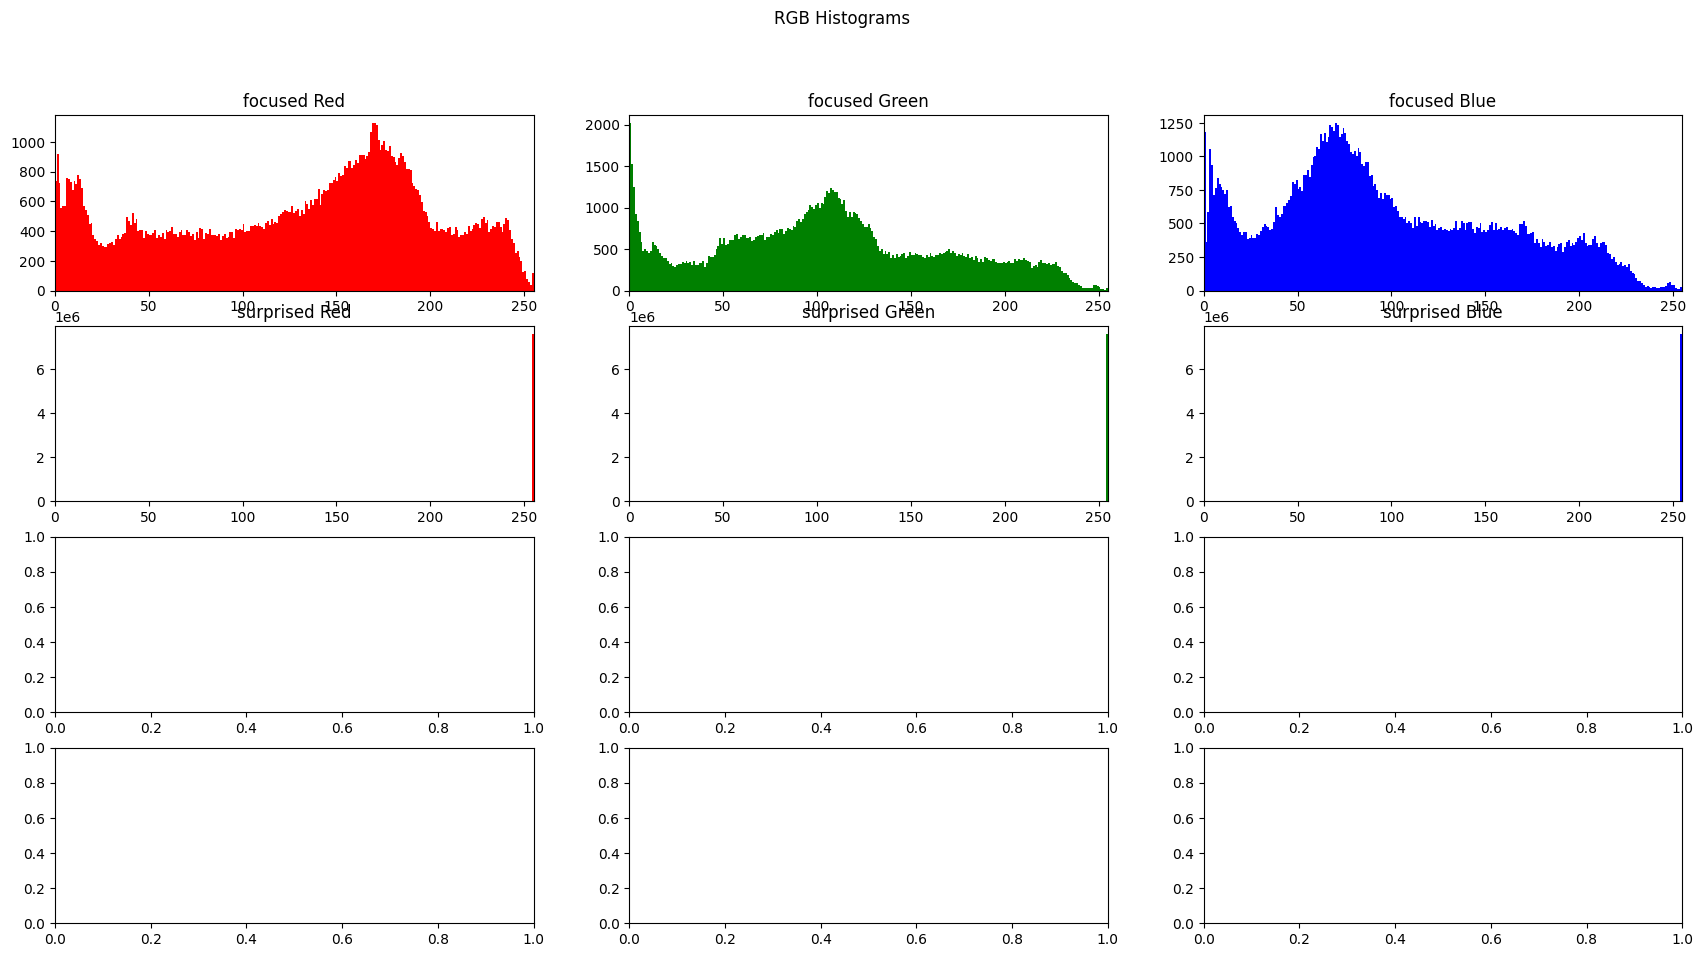

In [5]:
#make 3x4 plot for each folder
fig, axs = plt.subplots(4, 3)
fig.set_size_inches(21, 10.5)
fig.suptitle('RGB Histograms')

i = 0
for key in dict_images_values:
# for key in ['neutral']:
    #add title to each row

    axs[i, 0].hist(dict_images_values[key]['red'], bins=255, color='red')
    axs[i, 1].hist(dict_images_values[key]['green'], bins=255, color='green')
    axs[i, 2].hist(dict_images_values[key]['blue'], bins=255, color='blue')
    axs[i, 0].set_title(key + " Red")
    axs[i, 1].set_title(key + " Green")
    axs[i, 2].set_title(key + " Blue")
    axs[i, 0].set_xlim([0, 255])
    axs[i, 1].set_xlim([0, 255])
    axs[i, 2].set_xlim([0, 255])
    

    i =+ 1
        
plt.show()